# 12. Model selection
Here are some popular deep learning models used in time series analysis and forecasting, along with their suitability for different types of problems:

1. Recurrent Neural Networks (RNNs):
   - Suitable for sequential data with short-term dependencies.
   - Can capture temporal patterns and dependencies in time series data.
   - Appropriate for problems where the current prediction is dependent on previous observations.
   - Common variants include Long Short-Term Memory (LSTM) and Gated Recurrent Unit (GRU) models.
   - Widely used for various time series forecasting tasks, including stock market prediction, weather forecasting, and demand forecasting.

2. Convolutional Neural Networks (CNNs):
   - Primarily designed for image processing, but can be applied to time series data as well.
   - Effective for extracting local patterns and features from time series data.
   - Suitable for problems where the time series can be represented as an image or transformed into a two-dimensional structure (e.g., spectrograms, wavelet transforms).
   - Used for tasks like human activity recognition, speech recognition, and electroencephalogram (EEG) analysis.

3. Transformer Models:
   - Originally introduced for natural language processing tasks, such as machine translation and language modeling.
   - Can be adapted for time series analysis by treating the sequence as a language sequence.
   - Suitable for problems where long-term dependencies and global patterns in the time series are important.
   - Provide parallel processing capabilities and are highly scalable.
   - Used for tasks like machine translation, sentiment analysis, and anomaly detection in time series data.

4. Autoencoders:
   - Neural networks designed to reconstruct their input data, used for unsupervised learning.
   - Can learn compact representations of time series data by encoding the input into a lower-dimensional latent space.
   - Useful for dimensionality reduction and feature extraction in time series analysis.
   - Applied to tasks like anomaly detection, denoising, and feature extraction from sensor data.

5. Generative Adversarial Networks (GANs):
   - Comprise a generator and a discriminator network that compete against each other.
   - Can generate synthetic time series data that follows similar patterns as the real data.
   - Useful for data augmentation, synthetic data generation, and improving the robustness of time series models.
   - Applied to tasks like synthetic data generation for training deep learning models and data augmentation for rare events.

It's important to note that the suitability of these models may vary depending on the specific characteristics of your time series data, such as the length of the sequence, the presence of trend or seasonality, the amount of available data, and the forecasting horizon. It is recommended to experiment with different models and compare their performance on your specific problem to determine the most suitable model for your time series analysis and forecasting task.

Here are some possible combinations of deep learning architectures for each above-mentioned category of time series analysis and forecasting:

1. Recurrent Neural Networks (RNNs):
   - Single-layer LSTM/GRU: A basic RNN architecture with a single LSTM or GRU layer.
   - Stacked LSTM/GRU: Multiple LSTM or GRU layers stacked on top of each other.
   - Bidirectional LSTM/GRU: LSTM or GRU layers that process the input sequence in both forward and backward directions.
   - Encoder-Decoder LSTM/GRU: Consists of an encoder LSTM or GRU to encode the input sequence and a decoder LSTM or GRU to generate the output sequence.
   - Attention-based LSTM/GRU: Includes an attention mechanism to focus on relevant parts of the input sequence.
   - Hybrid RNN models: Combination of LSTM/GRU layers with other types of layers, such as convolutional layers or fully connected layers.

2. Convolutional Neural Networks (CNNs):
   - 1D CNN: A basic CNN architecture with one-dimensional convolutional layers followed by pooling layers and fully connected layers.
   - Dilated CNN: Uses dilated convolutional layers to capture patterns at different time scales.
   - Temporal Convolutional Network (TCN): Employs causal convolutional layers with residual connections for capturing long-term dependencies.
   - ConvLSTM: Combines convolutional layers with LSTM layers to capture spatial and temporal patterns simultaneously.
   - Hybrid CNN models: Combination of CNN layers with other types of layers, such as recurrent layers or attention layers.

3. Transformer Models:
   - Transformer: Consists of self-attention layers and feed-forward layers.
   - Encoder-Decoder Transformer: Similar to the Transformer, but with separate encoder and decoder components for sequence-to-sequence tasks.
   - Time2Vec + Transformer: Uses Time2Vec encoding to capture temporal information and combines it with the Transformer architecture.
   - Convolutional Transformer: Incorporates convolutional layers in the Transformer architecture for capturing local patterns.
   - Hybrid Transformer models: Combination of Transformer layers with other types of layers, such as convolutional layers or recurrent layers.

4. Autoencoders:
   - Vanilla Autoencoder: Consists of an encoder and decoder network, where the encoder compresses the input into a latent space and the decoder reconstructs the input from the latent representation.
   - Variational Autoencoder (VAE): Extends the vanilla autoencoder with probabilistic encodings, enabling generation of new samples.
   - Denoising Autoencoder: Trained to reconstruct clean input from noisy input, useful for denoising time series data.
   - Sequence-to-Sequence Autoencoder: Uses recurrent layers to handle sequential input and output for reconstructing time series data.

5. Generative Adversarial Networks (GANs):
   - Vanilla GAN: Comprises a generator network that generates synthetic time series data and a discriminator network that distinguishes between real and synthetic data.
   - Conditional GAN: Includes additional conditioning inputs to both the generator and discriminator networks for controlled generation of synthetic time series data.
   - TimeGAN: Specifically designed for time series data generation by employing a combination of LSTM layers and a modified GAN architecture.
   - Wasserstein GAN (WGAN): Utilizes the Wasserstein distance as the objective function for improved stability in training.

These are just some examples, and there can be various other combinations and variations of deep learning architectures depending on the specific requirements of your time series analysis and forecasting problem. It's important to experiment and fine-tune these architectures based on your specific dataset and problem domain.

## 12.1 Recurrent Neural Networks (RNNs)

### 12.1.1 Single layer LSTM
Let's create a simple example where we forecast a synthetic sine wave time series using a single-layer LSTM.

Steps involved:

1. **Synthetic Time Series Creation**: We'll create a sine wave time series for this.
2. **Data Preparation**: Convert the time series into sequences of fixed lengths and split them into training and testing sets.
3. **LSTM Model Creation**: Design a simple LSTM model using TensorFlow and Keras.
4. **Training**: Train the LSTM model on the training set.
5. **Forecasting**: Use the trained LSTM model to forecast future values.
6. **Visualization**: Plot the original time series, training predictions, and forecasting.





 1/11 [=>............................] - ETA: 3s

11/11 [==============================] - 0s 2ms/step


1/5 [=====>........................] - ETA: 0s

5/5 [==============================] - 0s 2ms/step


Training MSE: 0.0704
Testing MSE: 0.0710
Training data Mean Absolute Error: 0.21
Testing data Mean Absolute Error: 0.21


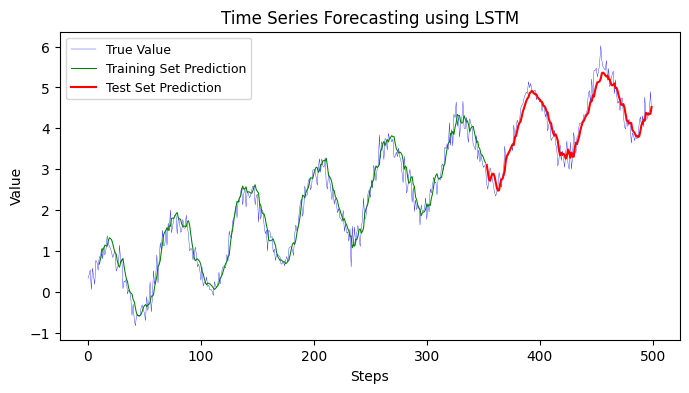

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error

# 1. Synthetic Time Series Creation
x = np.linspace(0, 50, 500)
# main signal
y = np.sin(x)

# trend
t = 0.1 * x

# noise
noise = np.random.normal(0, 0.2, y.shape)  # Gaussian noise with mean=0 and std=0.5
y = y + noise + t

# 2. Data Preparation
SEQ_LEN = 10
X, Y = [], []

for i in range(len(y) - SEQ_LEN):
    X.append(y[i:i+SEQ_LEN])
    Y.append(y[i+SEQ_LEN])

X, Y = np.array(X), np.array(Y)
# Adjust the training set and test set sizes
train_size = int(0.7 * len(X))
X_train, Y_train = X[:train_size], Y[:train_size]
X_test, Y_test = X[train_size:], Y[train_size:]

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# 3. LSTM Model Creation
model = Sequential()
model.add(LSTM(50, input_shape=(SEQ_LEN, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 4. Training
model.fit(X_train, Y_train, epochs=50, batch_size=16, verbose=0)

# 5. Forecasting
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Metric measurements

# Measure Squared Error
from sklearn.metrics import mean_squared_error, mean_absolute_error
train_mse = mean_squared_error(Y_train, train_predict)
test_mse = mean_squared_error(Y_test, test_predict)
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")

# Measure Mean Absolute Error
train_mae = mean_absolute_error(Y_train, train_predict)
test_mae = mean_absolute_error(Y_test, test_predict)
print(f"Training data Mean Absolute Error: {train_mae:.2f}")
print(f"Testing data Mean Absolute Error: {test_mae:.2f}")

# Adjusting the plotting indices:
train_predict_plot = np.empty_like(y)
train_predict_plot[:] = np.nan
train_predict_plot[SEQ_LEN:SEQ_LEN+len(train_predict)] = train_predict[:, 0]

# For test_predict_plot, start from the end of train_predict_plot and ensure the space is just right:
test_predict_plot = np.empty_like(y)
test_predict_plot[:] = np.nan
test_predict_plot[SEQ_LEN+len(train_predict):SEQ_LEN+len(train_predict)+len(test_predict)] = test_predict[:, 0]

plt.figure(figsize=(8, 4))
plt.plot(y, label="True Value", color='blue', linewidth=0.25)
plt.plot(train_predict_plot, label="Training Set Prediction", color='green', linewidth=0.75)
plt.plot(test_predict_plot, label="Test Set Prediction", color='red')
plt.xlabel("Steps")
plt.ylabel("Value")
plt.title("Time Series Forecasting using LSTM")
plt.legend(loc="upper left", fontsize=9)
plt.show()

The above code uses a single-layer LSTM to forecast the sine wave time series. The true sine wave is in blue, training set predictions are in green, and test set predictions are in red. Adjust the number of epochs, sequence length, or LSTM units as required for different results.

**To improve the performance of the LSTM model, you can try the following techniques:**

1. Increase the number of LSTM units: Adding more LSTM units can increase the model's capacity to capture complex patterns in the data. You can experiment with different numbers of units to find the optimal balance between model complexity and performance.

2. Use a deeper LSTM architecture: Instead of a single-layer LSTM, you can stack multiple LSTM layers on top of each other. This can help the model learn hierarchical representations of the data and capture more intricate patterns.

3. Adjust the learning rate: The learning rate determines the step size at each iteration during training. A smaller learning rate can help the model converge more slowly but potentially to a better solution. Experiment with different learning rates to find the optimal value for your problem.

4. Add regularization techniques: Regularization techniques such as dropout or recurrent dropout can help prevent overfitting by randomly dropping units or connections during training. This can improve the model's generalization ability. You can add dropout layers or specify dropout rates in the LSTM layers.

5. Increase the training data: More training data can provide the model with more examples to learn from, which can improve its generalization. If possible, consider acquiring or generating more data to train the model.

6. Adjust the batch size: The batch size determines how many samples are processed at once during training. Smaller batch sizes can provide a noisier gradient but may help the model generalize better. Conversely, larger batch sizes can provide a smoother gradient but may result in slower convergence. Experiment with different batch sizes to find the optimal value.

7. Try different activation functions: The choice of activation function can impact the model's ability to capture complex relationships. In addition to the sigmoid activation function used in the output layer, you can experiment with other activation functions such as tanh or ReLU in the LSTM layer to see if they improve performance.

Remember to fine-tune these techniques based on your specific problem and data characteristics.

### 12.1.2 Stacked LSTM



To modify the model to a stacked LSTM, you'll need to add more LSTM layers to the architecture. One important thing to remember when stacking LSTM layers is to set the `return_sequences` argument to `True` for all but the last LSTM layer. This allows each LSTM layer to return sequences to the next layer instead of just the output of the last time step.

Here's the modified model section with a stacked LSTM:


 1/11 [=>............................] - ETA: 9s

11/11 [==============================] - 1s 4ms/step


1/5 [=====>........................] - ETA: 0s

5/5 [==============================] - 0s 4ms/step


Training MSE: 0.0803
Testing MSE: 0.1894
Training data Mean Absolute Error: 0.22
Testing data Mean Absolute Error: 0.37


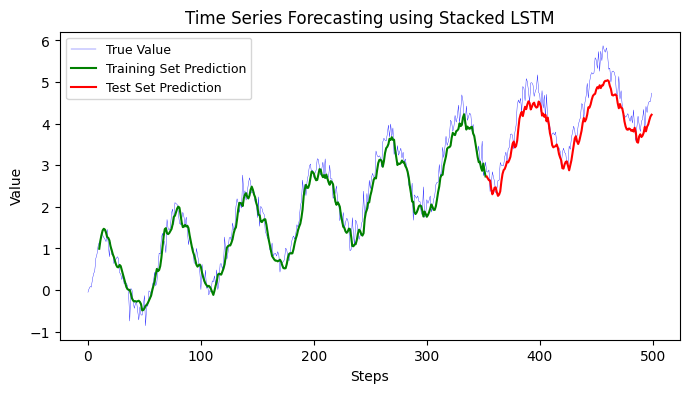

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error

# 1. Synthetic Time Series Creation
x = np.linspace(0, 50, 500)
# main signal
y = np.sin(x)

# trend
t = 0.1 * x

# noise
noise = np.random.normal(0, 0.2, y.shape)  # Gaussian noise with mean=0 and std=0.5

# final signals
y = y + noise + t

# 2. Data Preparation
SEQ_LEN = 10
X, Y = [], []

for i in range(len(y) - SEQ_LEN):
    X.append(y[i:i+SEQ_LEN])
    Y.append(y[i+SEQ_LEN])

X, Y = np.array(X), np.array(Y)
train_size = int(0.7 * len(X))
X_train, Y_train = X[:train_size], Y[:train_size]
X_test, Y_test = X[train_size:], Y[train_size:]

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# 3. Stacked LSTM Model Creation
model = Sequential()

# First LSTM layer
model.add(LSTM(50, return_sequences=True, input_shape=(SEQ_LEN, 1)))

# Second LSTM layer
model.add(LSTM(100, return_sequences=True))

# Third LSTM layer
model.add(LSTM(50))

# Dense layer to produce final output
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 4. Training
model.fit(X_train, Y_train, epochs=50, batch_size=16, verbose=0)

# 5. Forecasting
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Metric measurements

# Measure Squared Error
from sklearn.metrics import mean_squared_error, mean_absolute_error
train_mse = mean_squared_error(Y_train, train_predict)
test_mse = mean_squared_error(Y_test, test_predict)
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")

# Measure Mean Absolute Error
train_mae = mean_absolute_error(Y_train, train_predict)
test_mae = mean_absolute_error(Y_test, test_predict)
print(f"Training data Mean Absolute Error: {train_mae:.2f}")
print(f"Testing data Mean Absolute Error: {test_mae:.2f}")

# Adjusting the plotting indices:
train_predict_plot = np.empty_like(y)
train_predict_plot[:] = np.nan
train_predict_plot[SEQ_LEN:SEQ_LEN+len(train_predict)] = train_predict[:, 0]

test_predict_plot = np.empty_like(y)
test_predict_plot[:] = np.nan
test_predict_plot[SEQ_LEN+len(train_predict):SEQ_LEN+len(train_predict)+len(test_predict)] = test_predict[:, 0]

# 6. Visualization
plt.figure(figsize=(8, 4))
plt.plot(y, label="True Value", color='blue', linewidth=0.25)
plt.plot(train_predict_plot, label="Training Set Prediction", color='green')
plt.plot(test_predict_plot, label="Test Set Prediction", color='red')
plt.xlabel("Steps")
plt.ylabel("Value")
plt.title("Time Series Forecasting using Stacked LSTM")
plt.legend(loc="upper left", fontsize=9)
plt.show()


 1/11 [=>............................] - ETA: 16s

11/11 [==============================] - 2s 4ms/step


1/5 [=====>........................] - ETA: 0s

5/5 [==============================] - 0s 4ms/step


Training MSE: 0.0614
Testing MSE: 0.2257
Training data Mean Absolute Error: 0.20
Testing data Mean Absolute Error: 0.39


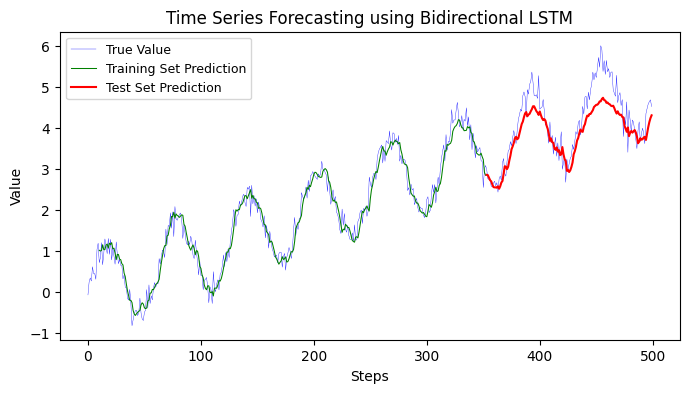

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional
from sklearn.metrics import mean_absolute_error

# 1. Synthetic Time Series Creation
x = np.linspace(0, 50, 500)
# main signal
y = np.sin(x)

# trend
t = 0.1 * x

# noise
noise = np.random.normal(0, 0.2, y.shape)  # Gaussian noise with mean=0 and std=0.2

# final signals
y = y + noise + t

# 2. Data Preparation
SEQ_LEN = 10
X, Y = [], []

for i in range(len(y) - SEQ_LEN):
    X.append(y[i:i+SEQ_LEN])
    Y.append(y[i+SEQ_LEN])

X, Y = np.array(X), np.array(Y)
train_size = int(0.7 * len(X))
X_train, Y_train = X[:train_size], Y[:train_size]
X_test, Y_test = X[train_size:], Y[train_size:]

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# 3. Bidirectional LSTM Model Creation
model = Sequential()

# First Bidirectional LSTM layer
model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(SEQ_LEN, 1)))

# Second Bidirectional LSTM layer
model.add(Bidirectional(LSTM(50, return_sequences=True)))

# Third Bidirectional LSTM layer
model.add(Bidirectional(LSTM(50)))

# Dense layer to produce final output
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 4. Training
model.fit(X_train, Y_train, epochs=50, batch_size=16, verbose=0)

# 5. Forecasting
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Metric measurements

# Measure Squared Error
from sklearn.metrics import mean_squared_error, mean_absolute_error
train_mse = mean_squared_error(Y_train, train_predict)
test_mse = mean_squared_error(Y_test, test_predict)
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")

# Measure Mean Absolute Error
train_mae = mean_absolute_error(Y_train, train_predict)
test_mae = mean_absolute_error(Y_test, test_predict)
print(f"Training data Mean Absolute Error: {train_mae:.2f}")
print(f"Testing data Mean Absolute Error: {test_mae:.2f}")

# Adjusting the plotting indices:
train_predict_plot = np.empty_like(y)
train_predict_plot[:] = np.nan
train_predict_plot[SEQ_LEN:SEQ_LEN+len(train_predict)] = train_predict[:, 0]

test_predict_plot = np.empty_like(y)
test_predict_plot[:] = np.nan
test_predict_plot[SEQ_LEN+len(train_predict):SEQ_LEN+len(train_predict)+len(test_predict)] = test_predict[:, 0]

# 6. Visualization
plt.figure(figsize=(8, 4))
plt.plot(y, label="True Value", color='blue', linewidth=0.25)
plt.plot(train_predict_plot, label="Training Set Prediction", color='green', linewidth=0.75)
plt.plot(test_predict_plot, label="Test Set Prediction", color='red')
plt.xlabel("Steps")
plt.ylabel("Value")
plt.title("Time Series Forecasting using Bidirectional LSTM")
plt.legend(loc="upper left", fontsize=9)
plt.show()


### 12.1.3 Bidirectional LSTM

To update the model to use Bidirectional LSTM, you'll have to make use of the Bidirectional layer from Keras, which wraps around LSTM layers. Here's how you can do it:

1. Import the Bidirectional layer from Keras.
2. Wrap each LSTM layer with the Bidirectional layer.

Here's the modified code with a Bidirectional LSTM:


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout
from sklearn.metrics import mean_absolute_error

# Synthetic Time Series Creation
x = np.linspace(0, 50, 500)
y = np.sin(x)
t = 0.1 * x
noise = np.random.normal(0, 0.2, y.shape)
y = y + noise + t

# Data Preparation
SEQ_LEN = 20  # Increased sequence length
X, Y = [], []
for i in range(len(y) - SEQ_LEN):
    X.append(y[i:i+SEQ_LEN])
    Y.append(y[i+SEQ_LEN])
X, Y = np.array(X), np.array(Y)
train_size = int(0.7 * len(X))
X_train, Y_train = X[:train_size], Y[:train_size]
X_test, Y_test = X[train_size:], Y[train_size:]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Model Creation
model = Sequential()
model.add(Bidirectional(LSTM(100, return_sequences=True, activation='relu'), input_shape=(SEQ_LEN, 1)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(100, return_sequences=True, activation='relu')))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(100, activation='relu')))
model.add(Dropout(0.2))
model.add(Dense(1))

# Using a learning rate schedule
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Training
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model.fit(X_train, Y_train, epochs=150, batch_size=32, validation_data=(X_test, Y_test), callbacks=[early_stopping], verbose=1)

# Forecasting
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)



Epoch 1/150


 1/11 [=>............................] - ETA: 1:00 - loss: 4.2085

 2/11 [====>.........................] - ETA: 1s - loss: 3.8878  

 3/11 [=======>......................] - ETA: 1s - loss: 3.6815

 4/11 [=========>....................] - ETA: 1s - loss: 3.3871

 5/11 [============>.................] - ETA: 1s - loss: 3.1540

 6/11 [===============>..............] - ETA: 0s - loss: 2.8353

 7/11 [==================>...........] - ETA: 0s - loss: 2.5639

 8/11 [====================>.........] - ETA: 0s - loss: 2.3823

 9/11 [=======================>......] - ETA: 0s - loss: 2.1939

10/11 [==========================>...] - ETA: 0s - loss: 2.0473

11/11 [==============================] - ETA: 0s - loss: 1.9856

11/11 [==============================] - 9s 250ms/step - loss: 1.9856 - val_loss: 0.5619


Epoch 2/150


 1/11 [=>............................] - ETA: 1s - loss: 0.3243

 2/11 [====>.........................] - ETA: 1s - loss: 0.4104

 3/11 [=======>......................] - ETA: 1s - loss: 0.5004

 4/11 [=========>....................] - ETA: 1s - loss: 0.5082

 5/11 [============>.................] - ETA: 1s - loss: 0.5200

 6/11 [===============>..............] - ETA: 0s - loss: 0.4926

 7/11 [==================>...........] - ETA: 0s - loss: 0.4836

 8/11 [====================>.........] - ETA: 0s - loss: 0.4867

 9/11 [=======================>......] - ETA: 0s - loss: 0.4819

10/11 [==========================>...] - ETA: 0s - loss: 0.4755

11/11 [==============================] - ETA: 0s - loss: 0.4743

11/11 [==============================] - 2s 183ms/step - loss: 0.4743 - val_loss: 0.8100


Epoch 3/150


 1/11 [=>............................] - ETA: 1s - loss: 0.4966

 2/11 [====>.........................] - ETA: 1s - loss: 0.4709

 3/11 [=======>......................] - ETA: 1s - loss: 0.4175

 4/11 [=========>....................] - ETA: 1s - loss: 0.4420

 5/11 [============>.................] - ETA: 0s - loss: 0.4127

 6/11 [===============>..............] - ETA: 0s - loss: 0.4213

 7/11 [==================>...........] - ETA: 0s - loss: 0.4151

 8/11 [====================>.........] - ETA: 0s - loss: 0.4114

 9/11 [=======================>......] - ETA: 0s - loss: 0.3994

10/11 [==========================>...] - ETA: 0s - loss: 0.3879

11/11 [==============================] - ETA: 0s - loss: 0.3845

11/11 [==============================] - 2s 169ms/step - loss: 0.3845 - val_loss: 0.3164


Epoch 4/150


 1/11 [=>............................] - ETA: 1s - loss: 0.2610

 2/11 [====>.........................] - ETA: 1s - loss: 0.2544

 3/11 [=======>......................] - ETA: 1s - loss: 0.2809

 4/11 [=========>....................] - ETA: 1s - loss: 0.2749

 5/11 [============>.................] - ETA: 0s - loss: 0.2551

 6/11 [===============>..............] - ETA: 0s - loss: 0.2647

 7/11 [==================>...........] - ETA: 0s - loss: 0.2553

 8/11 [====================>.........] - ETA: 0s - loss: 0.2530

 9/11 [=======================>......] - ETA: 0s - loss: 0.2625

10/11 [==========================>...] - ETA: 0s - loss: 0.2471

11/11 [==============================] - ETA: 0s - loss: 0.2448

11/11 [==============================] - 2s 170ms/step - loss: 0.2448 - val_loss: 0.1064


Epoch 5/150


 1/11 [=>............................] - ETA: 1s - loss: 0.1563

 2/11 [====>.........................] - ETA: 1s - loss: 0.1583

 3/11 [=======>......................] - ETA: 1s - loss: 0.1808

 4/11 [=========>....................] - ETA: 1s - loss: 0.1648

 5/11 [============>.................] - ETA: 0s - loss: 0.1586

 6/11 [===============>..............] - ETA: 0s - loss: 0.1583

 7/11 [==================>...........] - ETA: 0s - loss: 0.1527

 8/11 [====================>.........] - ETA: 0s - loss: 0.1531

 9/11 [=======================>......] - ETA: 0s - loss: 0.1584

10/11 [==========================>...] - ETA: 0s - loss: 0.1624

11/11 [==============================] - ETA: 0s - loss: 0.1599

11/11 [==============================] - 2s 168ms/step - loss: 0.1599 - val_loss: 0.8374


Epoch 6/150


 1/11 [=>............................] - ETA: 1s - loss: 0.0737

 2/11 [====>.........................] - ETA: 1s - loss: 0.0812

 3/11 [=======>......................] - ETA: 1s - loss: 0.0775

 4/11 [=========>....................] - ETA: 1s - loss: 0.1234

 5/11 [============>.................] - ETA: 0s - loss: 0.1276

 6/11 [===============>..............] - ETA: 0s - loss: 0.1341

 7/11 [==================>...........] - ETA: 0s - loss: 0.1315

 8/11 [====================>.........] - ETA: 0s - loss: 0.1347

 9/11 [=======================>......] - ETA: 0s - loss: 0.1380

10/11 [==========================>...] - ETA: 0s - loss: 0.1361

11/11 [==============================] - ETA: 0s - loss: 0.1348

11/11 [==============================] - 2s 168ms/step - loss: 0.1348 - val_loss: 0.0980


Epoch 7/150


 1/11 [=>............................] - ETA: 1s - loss: 0.1422

 2/11 [====>.........................] - ETA: 1s - loss: 0.1360

 3/11 [=======>......................] - ETA: 1s - loss: 0.1333

 4/11 [=========>....................] - ETA: 1s - loss: 0.1386

 5/11 [============>.................] - ETA: 0s - loss: 0.1306

 6/11 [===============>..............] - ETA: 0s - loss: 0.1368

 7/11 [==================>...........] - ETA: 0s - loss: 0.1323

 8/11 [====================>.........] - ETA: 0s - loss: 0.1265

 9/11 [=======================>......] - ETA: 0s - loss: 0.1257

10/11 [==========================>...] - ETA: 0s - loss: 0.1463

11/11 [==============================] - ETA: 0s - loss: 0.1422

11/11 [==============================] - 2s 167ms/step - loss: 0.1422 - val_loss: 0.2037


Epoch 8/150


 1/11 [=>............................] - ETA: 1s - loss: 0.1765

 2/11 [====>.........................] - ETA: 1s - loss: 0.1503

 3/11 [=======>......................] - ETA: 1s - loss: 0.1418

 4/11 [=========>....................] - ETA: 1s - loss: 0.1319

 5/11 [============>.................] - ETA: 0s - loss: 0.1250

 6/11 [===============>..............] - ETA: 0s - loss: 0.1212

 7/11 [==================>...........] - ETA: 0s - loss: 0.1197

 8/11 [====================>.........] - ETA: 0s - loss: 0.1171

 9/11 [=======================>......] - ETA: 0s - loss: 0.1163

10/11 [==========================>...] - ETA: 0s - loss: 0.1209

11/11 [==============================] - ETA: 0s - loss: 0.1182

11/11 [==============================] - 2s 164ms/step - loss: 0.1182 - val_loss: 0.1508


Epoch 9/150


 1/11 [=>............................] - ETA: 1s - loss: 0.1051

 2/11 [====>.........................] - ETA: 1s - loss: 0.1136

 3/11 [=======>......................] - ETA: 1s - loss: 0.0981

 4/11 [=========>....................] - ETA: 1s - loss: 0.1015

 5/11 [============>.................] - ETA: 0s - loss: 0.1032

 6/11 [===============>..............] - ETA: 0s - loss: 0.0984

 7/11 [==================>...........] - ETA: 0s - loss: 0.1003

 8/11 [====================>.........] - ETA: 0s - loss: 0.0977

 9/11 [=======================>......] - ETA: 0s - loss: 0.1041

10/11 [==========================>...] - ETA: 0s - loss: 0.1043

11/11 [==============================] - ETA: 0s - loss: 0.1039

11/11 [==============================] - 2s 168ms/step - loss: 0.1039 - val_loss: 0.7028


Epoch 10/150


 1/11 [=>............................] - ETA: 1s - loss: 0.1248

 2/11 [====>.........................] - ETA: 1s - loss: 0.1095

 3/11 [=======>......................] - ETA: 1s - loss: 0.1164

 4/11 [=========>....................] - ETA: 1s - loss: 0.1275

 5/11 [============>.................] - ETA: 0s - loss: 0.1351

 6/11 [===============>..............] - ETA: 0s - loss: 0.1297

 7/11 [==================>...........] - ETA: 0s - loss: 0.1354

 8/11 [====================>.........] - ETA: 0s - loss: 0.1333

 9/11 [=======================>......] - ETA: 0s - loss: 0.1280

10/11 [==========================>...] - ETA: 0s - loss: 0.1266

11/11 [==============================] - ETA: 0s - loss: 0.1265

11/11 [==============================] - 2s 167ms/step - loss: 0.1265 - val_loss: 0.2104


Epoch 11/150


 1/11 [=>............................] - ETA: 1s - loss: 0.1256

 2/11 [====>.........................] - ETA: 1s - loss: 0.1382

 3/11 [=======>......................] - ETA: 1s - loss: 0.1418

 4/11 [=========>....................] - ETA: 1s - loss: 0.1275

 5/11 [============>.................] - ETA: 0s - loss: 0.1235

 6/11 [===============>..............] - ETA: 0s - loss: 0.1288

 7/11 [==================>...........] - ETA: 0s - loss: 0.1323

 8/11 [====================>.........] - ETA: 0s - loss: 0.1306

 9/11 [=======================>......] - ETA: 0s - loss: 0.1304

10/11 [==========================>...] - ETA: 0s - loss: 0.1380

11/11 [==============================] - ETA: 0s - loss: 0.1362

11/11 [==============================] - 2s 162ms/step - loss: 0.1362 - val_loss: 0.1107


Epoch 12/150


 1/11 [=>............................] - ETA: 1s - loss: 0.1138

 2/11 [====>.........................] - ETA: 1s - loss: 0.0787

 3/11 [=======>......................] - ETA: 1s - loss: 0.1021

 4/11 [=========>....................] - ETA: 1s - loss: 0.1004

 5/11 [============>.................] - ETA: 0s - loss: 0.1023

 6/11 [===============>..............] - ETA: 0s - loss: 0.1030

 7/11 [==================>...........] - ETA: 0s - loss: 0.1146

 8/11 [====================>.........] - ETA: 0s - loss: 0.1180

 9/11 [=======================>......] - ETA: 0s - loss: 0.1284

10/11 [==========================>...] - ETA: 0s - loss: 0.1274

11/11 [==============================] - ETA: 0s - loss: 0.1277

11/11 [==============================] - 2s 161ms/step - loss: 0.1277 - val_loss: 0.4698


Epoch 13/150


 1/11 [=>............................] - ETA: 1s - loss: 0.1542

 2/11 [====>.........................] - ETA: 1s - loss: 0.1080

 3/11 [=======>......................] - ETA: 1s - loss: 0.1135

 4/11 [=========>....................] - ETA: 1s - loss: 0.1140

 5/11 [============>.................] - ETA: 0s - loss: 0.1140

KeyboardInterrupt: 

Training MSE: 0.0884
Testing MSE: 0.0613
Training data Mean Absolute Error: 0.24
Testing data Mean Absolute Error: 0.21


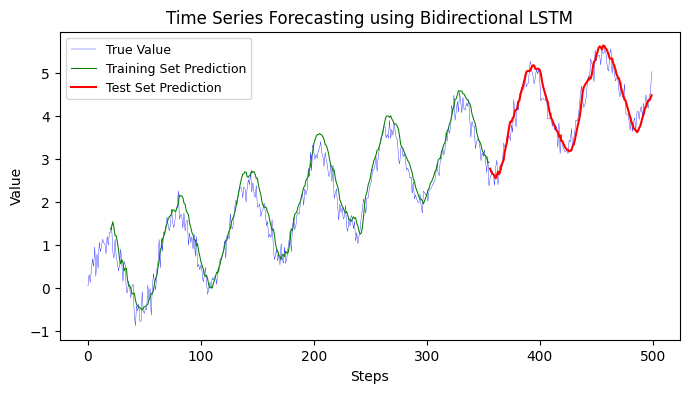

In [12]:
# Metric measurements
# Measure Squared Error
from sklearn.metrics import mean_squared_error, mean_absolute_error
train_mse = mean_squared_error(Y_train, train_predict)
test_mse = mean_squared_error(Y_test, test_predict)
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")

# Measure Mean Absolute Error
train_mae = mean_absolute_error(Y_train, train_predict)
test_mae = mean_absolute_error(Y_test, test_predict)
print(f"Training data Mean Absolute Error: {train_mae:.2f}")
print(f"Testing data Mean Absolute Error: {test_mae:.2f}")

# Visualization
train_predict_plot = np.empty_like(y)
train_predict_plot[:] = np.nan
train_predict_plot[SEQ_LEN:len(train_predict) + SEQ_LEN] = train_predict[:, 0]

test_predict_plot = np.empty_like(y)
test_predict_plot[:] = np.nan
start_idx = len(train_predict) + SEQ_LEN
test_predict_plot[start_idx:start_idx+len(test_predict)] = test_predict[:, 0]

plt.figure(figsize=(8, 4))
plt.plot(y, label="True Value", color='blue', linewidth=0.25)
plt.plot(train_predict_plot, label="Training Set Prediction", color='green', linewidth=0.75)
plt.plot(test_predict_plot, label="Test Set Prediction", color='red')
plt.xlabel("Steps")
plt.ylabel("Value")
plt.title("Time Series Forecasting using Bidirectional LSTM")
plt.legend(loc="upper left", fontsize=9)
plt.show()
exit()

### 12.1.4 Encoder-Decoder LSTM

The Encoder-Decoder LSTM architecture is typically used for sequence-to-sequence prediction problems. In the context of time series forecasting, the encoder LSTM model is responsible for reading and interpreting the input sequence, and the decoder LSTM model is responsible for outputting the prediction sequence.

Here's an updated version of the previous code using the Encoder-Decoder LSTM architecture for time series forecasting.
In this Encoder-Decoder architecture:
* The encoder reads the input sequence and returns the final hidden state which serves as the "context" or "memory" for the decoder.
* The RepeatVector layer is used to repeat the encoder output
for each time step in the output sequence.
* The decoder uses this repeated context as input along with its LSTM layers to produce the sequence of predictions.
* The TimeDistributed layer allows the dense layer to independently process each time step in the output sequence.




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Input, RepeatVector, TimeDistributed
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Synthetic Time Series Creation
x = np.linspace(0, 50, 500)
y = np.sin(x)
t = 0.1 * x
noise = np.random.normal(0, 0.2, y.shape)
y = y + noise + t

# Data Preparation
SEQ_LEN = 20
X, Y = [], []
for i in range(len(y) - 2*SEQ_LEN):
    X.append(y[i:i+SEQ_LEN])
    Y.append(y[i+SEQ_LEN:i+2*SEQ_LEN])
X, Y = np.array(X), np.array(Y)
train_size = int(0.7 * len(X))
X_train, Y_train = X[:train_size], Y[:train_size]
X_test, Y_test = X[train_size:], Y[train_size:]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
Y_train = np.reshape(Y_train, (Y_train.shape[0], Y_train.shape[1], 1))
Y_test = np.reshape(Y_test, (Y_test.shape[0], Y_test.shape[1], 1))

# Encoder-Decoder LSTM Model Creation
encoder_inputs = Input(shape=(SEQ_LEN, 1))
encoder = LSTM(100, activation='relu', return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
encoder_states = [state_h, state_c]

decoder_inputs = RepeatVector(SEQ_LEN)(encoder_outputs)
decoder_lstm = LSTM(100, activation='relu', return_sequences=True)
decoder_outputs = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = TimeDistributed(Dense(1))
decoder_outputs = decoder_dense(decoder_outputs)

model = Model(encoder_inputs, decoder_outputs)
model.compile(optimizer='adam', loss='mean_squared_error')

# Training
model.fit(X_train, Y_train, epochs=150, batch_size=32, validation_data=(X_test, Y_test), verbose=1)

# Forecasting
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Flatten arrays for metric calculation
Y_train_flattened = Y_train.reshape(Y_train.shape[0], -1)
train_predict_flattened = train_predict.reshape(train_predict.shape[0], -1)
Y_test_flattened = Y_test.reshape(Y_test.shape[0], -1)
test_predict_flattened = test_predict.reshape(test_predict.shape[0], -1)






Training MSE: 0.1409
Testing MSE: 0.6346
Training data Mean Absolute Error: 0.21
Testing data Mean Absolute Error: 0.41


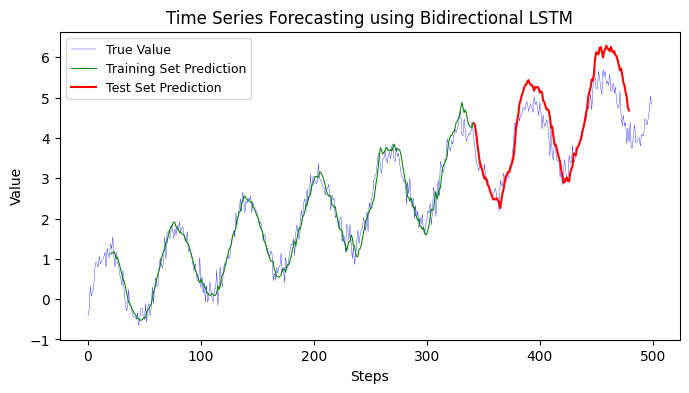

In [4]:
# Metric measurements

# Measure Squared Error
train_mse = mean_squared_error(Y_train_flattened, train_predict_flattened)
test_mse = mean_squared_error(Y_test_flattened, test_predict_flattened)
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")

# Measure Mean Absolute Error
train_mae = mean_absolute_error(Y_train[:,0,:], train_predict[:,0,:])
test_mae = mean_absolute_error(Y_test[:,0,:], test_predict[:,0,:])
print(f"Training data Mean Absolute Error: {train_mae:.2f}")
print(f"Testing data Mean Absolute Error: {test_mae:.2f}")

# Visualization
plt.figure(figsize=(8, 4))
plt.plot(y, label="True Value", color='blue', linewidth=0.25)

# Assuming you want to plot predictions for both train and test sets:
train_predict_plot = np.empty_like(y)
train_predict_plot[:] = np.nan
train_predict_plot[SEQ_LEN:SEQ_LEN+len(train_predict)] = train_predict[:, 0, 0]

test_predict_plot = np.empty_like(y)
test_predict_plot[:] = np.nan
test_predict_plot[2*SEQ_LEN+train_size-SEQ_LEN:2*SEQ_LEN+train_size-SEQ_LEN+len(test_predict)] = test_predict[:, 0, 0]

plt.plot(train_predict_plot, label="Training Set Prediction", color='green', linewidth=0.75)
plt.plot(test_predict_plot, label="Test Set Prediction", color='red')
plt.xlabel("Steps")
plt.ylabel("Value")
plt.title("Time Series Forecasting using Bidirectional LSTM")
plt.legend(loc="upper left", fontsize=9)
plt.show()
exit()

### 12.1.5 Attention-based LSTM

To incorporate an Attention mechanism into the LSTM model, we can use the `Attention` layer provided by the Keras-Attention library.

In this updated code, I made the following changes:

- Imported the `SeqSelfAttention` layer from the `keras_self_attention` library. This layer adds attention mechanism to the LSTM layer.

- Defined the input layer using `Input` from `tensorflow.keras.layers`.

- Added the `SeqSelfAttention` layer after the LSTM layer to introduce the attention mechanism.

- Removed the additional reshaping of the target sequence (`y_train` and `y_test`) as it is not necessary for this model.

- Fit the model using `X_train` and `y_train` as input data.

- Evaluated the model using `X_test` and `y_test`.
!

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense,Flatten, Input, Concatenate, Permute, Dot, Multiply, Reshape
from tensorflow.keras.models import Model
from sklearn.metrics import mean_absolute_error

# Attention Mechanism Layer
def attention_mechanism(inputs):
    a = Permute((2, 1))(inputs)
    a = Dense(SEQ_LEN, activation='softmax')(a)
    a_probs = Permute((2, 1))(a)
    output_attention_mul = Multiply()([inputs, a_probs])
    return output_attention_mul

# Synthetic Time Series Creation
x = np.linspace(0, 50, 500)
y = np.sin(x)
t = 0.1 * x
noise = np.random.normal(0, 0.2, y.shape)
y = y + noise + t

# Data Preparation
SEQ_LEN = 20
X, Y = [], []

for i in range(len(y) - SEQ_LEN):
    X.append(y[i:i+SEQ_LEN])
    Y.append(y[i+SEQ_LEN])

X, Y = np.array(X), np.array(Y)
train_size = int(0.7 * len(X))
X_train, Y_train = X[:train_size], Y[:train_size]
X_test, Y_test = X[train_size:], Y[train_size:]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Attention-based LSTM Model Creation
inputs = Input(shape=(SEQ_LEN, 1))
lstm_out = LSTM(50, return_sequences=True)(inputs)
attention_out = attention_mechanism(lstm_out)
attention_out = Flatten()(attention_out)
output = Dense(1, activation='linear')(attention_out)

model = Model(inputs=[inputs], outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error')

# Training
model.fit(X_train, Y_train, epochs=150, batch_size=32, validation_data=(X_test, Y_test), verbose=1)

# Forecasting
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)




Training MSE: 0.0573
Testing MSE: 0.1836
Training data Mean Absolute Error: 0.19
Testing data Mean Absolute Error: 0.35


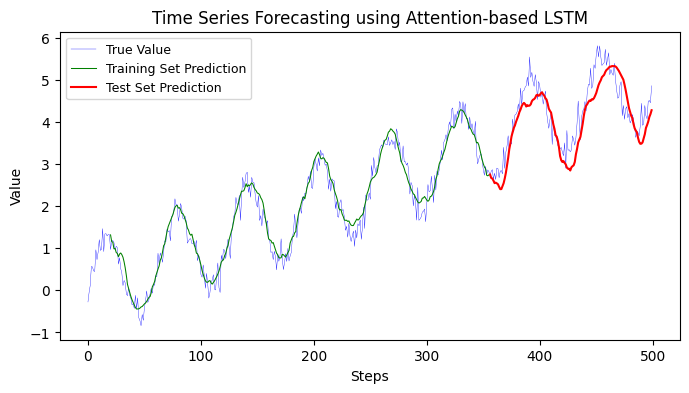

In [9]:
# Metric measurements

# Measure Squared Error
from sklearn.metrics import mean_squared_error, mean_absolute_error
train_mse = mean_squared_error(Y_train, train_predict)
test_mse = mean_squared_error(Y_test, test_predict)
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")

# Measure Mean Absolute Error
train_mae = mean_absolute_error(Y_train, train_predict)
test_mae = mean_absolute_error(Y_test, test_predict)
print(f"Training data Mean Absolute Error: {train_mae:.2f}")
print(f"Testing data Mean Absolute Error: {test_mae:.2f}")

# Visualization
plt.figure(figsize=(8, 4))
plt.plot(y, label="True Value", color='blue', linewidth=0.25)

# Train predictions
train_predict_plot = np.empty_like(y)
train_predict_plot[:] = np.nan
train_predict_plot[SEQ_LEN:train_size+SEQ_LEN] = train_predict[:, 0]

# Test predictions
test_predict_plot = np.empty_like(y)
test_predict_plot[:] = np.nan
test_predict_plot[train_size+SEQ_LEN:] = test_predict[:, 0]

plt.plot(train_predict_plot, label="Training Set Prediction", color='green', linewidth=0.75)
plt.plot(test_predict_plot, label="Test Set Prediction", color='red')
plt.xlabel("Steps")
plt.ylabel("Value")
plt.title("Time Series Forecasting using Attention-based LSTM")
plt.legend(loc="upper left", fontsize=9)
plt.show()
exit()

### 12.1.6 Hybrid RNN model

A Hybrid RNN model usually involves combining RNNs (or its variants like LSTMs or GRUs) with other types of neural networks (like CNNs or fully connected networks) to capitalize on the strengths of both types of networks.

In the context of time series forecasting, a common approach is to use Convolutional Neural Networks (CNNs) to automatically and adaptively learn spatial hierarchies of features from the time series data, and then pass those features to RNN layers to capture temporal dependencies.

Here's an example of a Hybrid CNN-LSTM model:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Conv1D, MaxPooling1D, Reshape

from sklearn.metrics import mean_absolute_error

# Synthetic Time Series Creation
x = np.linspace(0, 50, 500)
y = np.sin(x)
t = 0.1 * x
noise = np.random.normal(0, 0.2, y.shape)
y = y + noise + t

# Data Preparation
SEQ_LEN = 20
X, Y = [], []

for i in range(len(y) - SEQ_LEN):
    X.append(y[i:i+SEQ_LEN])
    Y.append(y[i+SEQ_LEN])

X, Y = np.array(X), np.array(Y)
train_size = int(0.7 * len(X))
X_train, Y_train = X[:train_size], Y[:train_size]
X_test, Y_test = X[train_size:], Y[train_size:]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Hybrid CNN-LSTM Model Creation
model = Sequential()

# CNN layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(SEQ_LEN, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

# Correct reshaping for LSTM
model.add(Reshape((9, 64)))
model.add(LSTM(50))

# Dense layer for prediction
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Training
model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test), verbose=1)

# Forecasting
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)



Training MSE: 0.0547
Testing MSE: 0.0813
Training data Mean Absolute Error: 0.19
Testing data Mean Absolute Error: 0.23


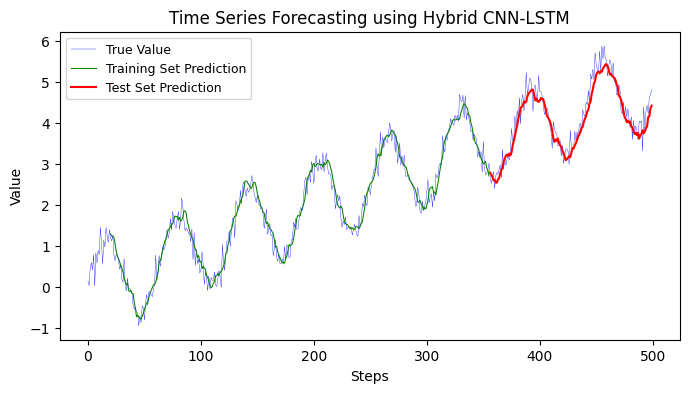

In [5]:
# Metric measurements

# Measure Squared Error
from sklearn.metrics import mean_squared_error, mean_absolute_error
train_mse = mean_squared_error(Y_train, train_predict)
test_mse = mean_squared_error(Y_test, test_predict)
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")

# Measure Mean Absolute Error
train_mae = mean_absolute_error(Y_train, train_predict)
test_mae = mean_absolute_error(Y_test, test_predict)
print(f"Training data Mean Absolute Error: {train_mae:.2f}")
print(f"Testing data Mean Absolute Error: {test_mae:.2f}")

# Visualization
plt.figure(figsize=(8, 4))
plt.plot(y, label="True Value", color='blue', linewidth=0.25)

# Train predictions
train_predict_plot = np.empty_like(y)
train_predict_plot[:] = np.nan
train_predict_plot[SEQ_LEN:train_size+SEQ_LEN] = train_predict[:, 0]

# Test predictions
test_predict_plot = np.empty_like(y)
test_predict_plot[:] = np.nan
test_predict_plot[train_size+SEQ_LEN:] = test_predict[:, 0]

plt.plot(train_predict_plot, label="Training Set Prediction", color='green', linewidth=0.75)
plt.plot(test_predict_plot, label="Test Set Prediction", color='red')
plt.xlabel("Steps")
plt.ylabel("Value")
plt.title("Time Series Forecasting using Hybrid CNN-LSTM")
plt.legend(loc="upper left", fontsize=9)
plt.show()
exit()

## 12.2 Convolutional Neural Networks (CNNs)

### 12.2.1  1D CNN

The provided code aims to perform time series forecasting using a 1D Convolutional Neural Network (CNN). I'll provide a step-by-step breakdown:

1. **Synthetic Time Series Creation**:
    - A synthetic time series is generated by combining a sine wave, a linear trend, and Gaussian noise. The signal represents a sinusoidal function plus a trend with some added noise.

2. **Data Preparation**:
    - A sliding window approach is used to prepare sequences of data for training the model. For instance, with `SEQ_LEN` set to 10, each input sequence consists of 10 time steps, and the corresponding output is the value at the next time step. This prepares the data for supervised learning.
    - The data is then split into a training set (70% of the data) and a testing set (the remaining 30%).

3. **1D CNN Model Creation**:
    - A 1D Convolutional Neural Network model is constructed for sequence prediction.
        - A 1D convolutional layer (`Conv1D`) captures patterns in the sequence data.
        - A max-pooling layer (`MaxPooling1D`) is used to down-sample the input representation, capturing the most important information.
        - A flattening layer (`Flatten`) transforms the 2D output of the convolutional layers to a 1D vector.
        - One dense layer (`Dense`) with 50 neurons and another one for output prediction are added.
    - The model is compiled using the 'adam' optimizer and Mean Squared Error (MSE) as the loss function.

4. **Training**:
    - The model is trained using the training data (both `X_train` and `Y_train`). The model iteratively adjusts its weights to minimize the loss over 100 epochs using batches of 16 sequences at a time.

5. **Forecasting**:
    - The trained model is used to predict values on both the training and testing sets.
    - Mean Absolute Error (MAE) is calculated for both the training and testing predictions to measure the model's performance.

6. **Visualization**:
    - The true time series, as well as the predictions made by the model on both the training and testing sets, are plotted on the same graph. This allows for a visual assessment of how well the model's predictions align with the actual values.

In essence, this code takes a noisy sinusoidal time series, trains a 1D CNN on it to understand its patterns, and then makes future predictions. It visualizes the actual time series and the predictions to see how close they are. The performance of the model is measured using the Mean Absolute Error on both the training and testing datasets.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import mean_absolute_error

# Synthetic Time Series Creation
x = np.linspace(0, 50, 500)
# main signal
y = np.sin(x)

# trend
t = 0.1 * x

# noise
noise = np.random.normal(0, 0.2, y.shape)  # Gaussian noise with mean=0 and std=0.2

# final signals
y = y + noise + t

# Data Preparation
SEQ_LEN = 10
X, Y = [], []

for i in range(len(y) - SEQ_LEN):
    X.append(y[i:i+SEQ_LEN])
    Y.append(y[i+SEQ_LEN])

X, Y = np.array(X), np.array(Y)
train_size = int(0.7 * len(X))
X_train, Y_train = X[:train_size], Y[:train_size]
X_test, Y_test = X[train_size:], Y[train_size:]

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# 1D CNN Model Creation
model = Sequential()

# 1D Convolutional layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(SEQ_LEN, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

# Dense layer for prediction
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Training
model.fit(X_train, Y_train, epochs=100, batch_size=16, verbose=0)

# Forecasting
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


Training MSE: 0.0473
Testing MSE: 0.0993
Training data Mean Absolute Error: 0.17
Testing data Mean Absolute Error: 0.26


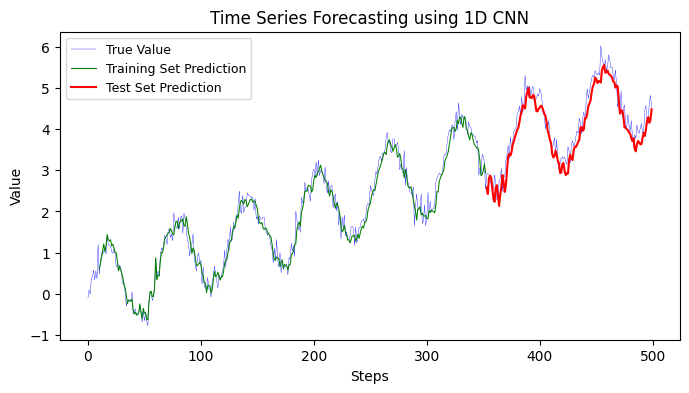

In [3]:
# Metric measurements

# Measure Squared Error
from sklearn.metrics import mean_squared_error, mean_absolute_error
train_mse = mean_squared_error(Y_train, train_predict)
test_mse = mean_squared_error(Y_test, test_predict)
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")

# Measure Mean Absolute Error
train_mae = mean_absolute_error(Y_train, train_predict)
test_mae = mean_absolute_error(Y_test, test_predict)
print(f"Training data Mean Absolute Error: {train_mae:.2f}")
print(f"Testing data Mean Absolute Error: {test_mae:.2f}")

# Adjusting the plotting indices:
train_predict_plot = np.empty_like(y)
train_predict_plot[:] = np.nan
train_predict_plot[SEQ_LEN:SEQ_LEN+len(train_predict)] = train_predict[:, 0]

test_predict_plot = np.empty_like(y)
test_predict_plot[:] = np.nan
test_predict_plot[SEQ_LEN+len(train_predict):SEQ_LEN+len(train_predict)+len(test_predict)] = test_predict[:, 0]

# 6. Visualization
plt.figure(figsize=(8, 4))
plt.plot(y, label="True Value", color='blue', linewidth=0.25)
plt.plot(train_predict_plot, label="Training Set Prediction", color='green', linewidth=0.75)
plt.plot(test_predict_plot, label="Test Set Prediction", color='red')
plt.xlabel("Steps")
plt.ylabel("Value")
plt.title("Time Series Forecasting using 1D CNN")
plt.legend(loc="upper left", fontsize=9)
plt.show()
exit()

###  12.2.2 Dilated CNN
**Convolutional Neural Networks (CNNs)** are designed to automatically and adaptively learn spatial hierarchies of features from input images. CNNs have been very successful in various image recognition tasks.

**1D CNNs**, as the name suggests, work with one-dimensional sequences instead of two-dimensional images. They have proven useful in various time series forecasting problems and natural language processing tasks where data is represented as a sequence (e.g., sentence, audio waveform).

**Dilated Convolutions**, or atrous convolutions, introduce another parameter to convolutional layers called the dilation rate. This dilation rate determines how far apart each weight of the convolutional filter is applied, effectively expanding the receptive field of the kernel without increasing the number of parameters or the computational cost.

For instance:
- A 1D convolution with a kernel size of 3 and a dilation rate of 1 would have its weights applied to the input sequence as `[x, x+1, x+2]`.
- With a dilation rate of 2, the same kernel would cover `[x, x+2, x+4]`.
- With a dilation rate of 3, it would be `[x, x+3, x+6]`, and so on.

**Dilated CNN vs. Regular 1D CNN:**

1. **Receptive Field**: One of the primary benefits of dilated convolutions is the increase in the receptive field. With standard convolutions, the receptive field grows linearly with the depth of the network. In contrast, with dilated convolutions, the receptive field grows exponentially, which allows the model to gather information from a wider range of input data without increasing the model's complexity.

2. **Parameters and Computational Cost**: Despite the increased receptive field, dilated convolutions do not introduce additional parameters or increase the computational cost, making them particularly attractive for tasks where capturing long-range dependencies is essential.

3. **Application**: Regular 1D CNNs are generally applied when short-term patterns or local features are of primary interest. In contrast, dilated CNNs are more useful in scenarios where long-term dependencies or global context matter, like in certain time series forecasting tasks or semantic segmentation in images.

4. **Hierarchical Representation**: By stacking dilated convolutional layers with increasing dilation rates, models can form a hierarchical representation of data. Each subsequent layer with a larger dilation rate can capture patterns at different scales or resolutions.

In summary, while both regular 1D CNNs and dilated CNNs operate on sequential data, dilated CNNs introduce a dilation rate to expand the receptive field of convolutional filters without increasing computational complexity. This makes dilated CNNs particularly useful for tasks that require the model to consider long-range dependencies in the data.

Here is an example that shows an updated code with Dilated CNN model.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Synthetic Time Series Creation
x = np.linspace(0, 50, 500)
# main signal
y = np.sin(x)

# trend
t = 0.1 * x

# noise
noise = np.random.normal(0, 0.2, y.shape)  # Gaussian noise with mean=0 and std=0.2

# final signals
y = y + noise + t

# Data Preparation
SEQ_LEN = 10
X, Y = [], []

for i in range(len(y) - SEQ_LEN):
    X.append(y[i:i+SEQ_LEN])
    Y.append(y[i+SEQ_LEN])

X, Y = np.array(X), np.array(Y)
train_size = int(0.7 * len(X))
X_train, Y_train = X[:train_size], Y[:train_size]
X_test, Y_test = X[train_size:], Y[train_size:]

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Dilated CNN Model Creation
model = Sequential()

model.add(Conv1D(64, 2, dilation_rate=1, activation='relu', input_shape=(SEQ_LEN, 1)))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(64, 2, dilation_rate=2, activation='relu'))  # dilation_rate=2 means skipping one element in between
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Training
model.fit(X_train, Y_train, epochs=50, batch_size=16, verbose=0)

# Forecasting
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


Training MSE: 0.0582
Testing MSE: 0.0695
Training MAE: 0.1910
Testing MAE: 0.2105


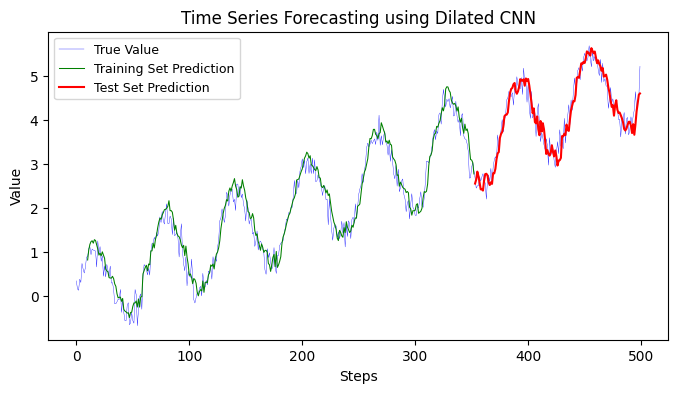

In [2]:
# Metric measurements
train_mse = mean_squared_error(Y_train, train_predict)
test_mse = mean_squared_error(Y_test, test_predict)
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")

train_mae = mean_absolute_error(Y_train, train_predict)
test_mae = mean_absolute_error(Y_test, test_predict)
print(f"Training MAE: {train_mae:.4f}")
print(f"Testing MAE: {test_mae:.4f}")

# Visualization
plt.figure(figsize=(8, 4))
plt.plot(y, label="True Value", color='blue', linewidth=0.25)
plt.plot(np.arange(SEQ_LEN, SEQ_LEN+len(train_predict)), train_predict, label="Training Set Prediction", color='green',linewidth=0.75)
plt.plot(np.arange(SEQ_LEN+len(train_predict), SEQ_LEN+len(train_predict)+len(test_predict)), test_predict, label="Test Set Prediction", color='red')
plt.xlabel("Steps")
plt.ylabel("Value")
plt.title("Time Series Forecasting using Dilated CNN")
plt.legend(loc="upper left", fontsize=9)
plt.show()
exit()

###  12.2.3 Temporal Convolutional Network (TCN)
Temporal Convolutional Networks (TCNs) are a type of deep learning model specifically designed for processing time series data. TCNs leverage the power of convolutional neural networks (CNNs) to capture temporal dependencies in the data, making them suitable for tasks such as time series analysis and forecasting.

The key characteristic of TCNs is the use of dilated convolutions, which allow for an expanded receptive field without increasing the number of parameters. Dilated convolutions have gaps between their filter weights, enabling them to capture long-range dependencies in the input sequence. This makes TCNs capable of modeling both short-term and long-term temporal patterns.

Applications of TCNs in time series analysis include:

1. Time Series Classification: TCNs can be used for classifying time series data into different categories. For example, they can be employed for activity recognition from sensor data or detecting anomalies in sensor readings.

2. Time Series Forecasting: TCNs can be utilized for predicting future values in a time series sequence. They can capture complex temporal patterns and learn to forecast future trends based on historical data.

3. Natural Language Processing: TCNs can be applied to sequence modeling tasks in natural language processing, such as text classification, sentiment analysis, and machine translation. In these cases, the input sequence is treated as a temporal sequence of words or characters.

4. Speech Recognition: TCNs can be used in speech recognition tasks to model and process audio waveforms over time. They can capture phonetic information and temporal dependencies in speech signals.

TCNs offer advantages such as parallel processing, efficient memory utilization, and the ability to capture long-range dependencies. They have shown promising results in various time series analysis tasks, often achieving competitive performance compared to other models like recurrent neural networks (RNNs) and long short-term memory (LSTM) networks.

In [ ]:
!pip install keras-tcn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tcn import TCN
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Synthetic Time Series Creation
x = np.linspace(0, 50, 500)
# main signal
y = np.sin(x)

# trend
t = 0.1 * x

# noise
noise = np.random.normal(0, 0.2, y.shape)  # Gaussian noise with mean=0 and std=0.2

# final signals
y = y + noise + t

# Data Preparation
SEQ_LEN = 10
X, Y = [], []

for i in range(len(y) - SEQ_LEN):
    X.append(y[i:i+SEQ_LEN])
    Y.append(y[i+SEQ_LEN])

X, Y = np.array(X), np.array(Y)
train_size = int(0.7 * len(X))
X_train, Y_train = X[:train_size], Y[:train_size]
X_test, Y_test = X[train_size:], Y[train_size:]

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# TCN Model Creation
model = Sequential()

model.add(TCN(input_shape=(SEQ_LEN, 1), nb_filters=64, kernel_size=2, nb_stacks=1, dilations=[1, 2, 4, 8], return_sequences=False))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Training
model.fit(X_train, Y_train, epochs=50, batch_size=16, verbose=0)

# Forecasting
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


Training MSE: 0.0431
Testing MSE: 0.0741
Training MAE: 0.1613
Testing MAE: 0.2190


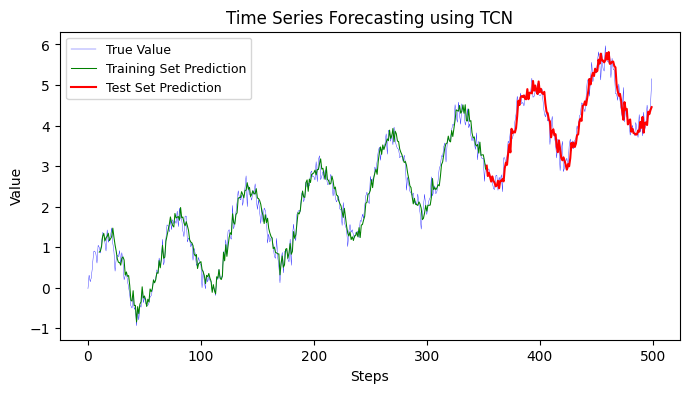

In [4]:
# Metric measurements
train_mse = mean_squared_error(Y_train, train_predict)
test_mse = mean_squared_error(Y_test, test_predict)
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")

train_mae = mean_absolute_error(Y_train, train_predict)
test_mae = mean_absolute_error(Y_test, test_predict)
print(f"Training MAE: {train_mae:.4f}")
print(f"Testing MAE: {test_mae:.4f}")

# 6. Visualization
plt.figure(figsize=(8, 4))
plt.plot(y, label="True Value", color='blue', linewidth=0.25)
plt.plot(np.arange(SEQ_LEN, SEQ_LEN+len(train_predict)), train_predict, label="Training Set Prediction", color='green',linewidth=0.75)
plt.plot(np.arange(SEQ_LEN+len(train_predict), SEQ_LEN+len(train_predict)+len(test_predict)), test_predict, label="Test Set Prediction", color='red')
plt.xlabel("Steps")
plt.ylabel("Value")
plt.title("Time Series Forecasting using TCN")
plt.legend(loc="upper left", fontsize=9)
plt.show()
exit()

###  12.2.4 ConvLSTM
ConvLSTM is a type of recurrent neural network that incorporates convolutional layers within LSTM (Long Short-Term Memory) units. It combines the spatial learning capabilities of convolutional neural networks (CNNs) with the temporal modeling capabilities of LSTMs. ConvLSTM is specifically designed for processing spatiotemporal data, making it well-suited for tasks involving time series analysis and prediction.

In ConvLSTM, the input data is typically in the form of a sequence of two-dimensional (2D) feature maps, where each feature map represents a frame or a snapshot in time. The convolutional LSTM units allow the network to learn spatial patterns across the feature maps as well as capture the temporal dependencies between consecutive frames.

The main advantages of ConvLSTM for time series analysis and prediction include:

1. **Spatial-Temporal Learning**: ConvLSTM can capture both spatial and temporal patterns in the input data. It can automatically learn hierarchical representations of the spatiotemporal features, enabling it to model complex dependencies within the time series.

2. **End-to-End Learning**: ConvLSTM can learn to extract relevant features directly from the raw input data without requiring manual feature engineering. It can effectively learn spatial and temporal representations in an end-to-end manner, reducing the need for manual preprocessing.

3. **Variable-Length Sequences**: ConvLSTM can handle variable-length input sequences, making it suitable for time series data with varying lengths. It can adaptively process sequences of different lengths and capture long-term dependencies across the time axis.

4. **Robustness to Noise**: ConvLSTM's ability to model spatial and temporal dependencies helps in reducing the impact of noise in the input data. It can learn to filter out noise and focus on relevant patterns, leading to improved prediction accuracy.

The applications of ConvLSTM in time series analysis and prediction are wide-ranging, including:

1. **Video Analysis**: ConvLSTM is commonly used for video understanding tasks such as action recognition, video classification, and video segmentation. It can model temporal dynamics and spatial structures within video sequences, enabling accurate analysis and prediction.

2. **Weather Forecasting**: ConvLSTM can be applied to analyze and predict weather patterns using spatiotemporal data such as temperature, humidity, and wind speed. It can capture the dependencies between different weather features over time, leading to accurate weather forecasting.

3. **Financial Time Series Analysis**: ConvLSTM can be used to model and predict financial time series data, such as stock prices, exchange rates, and market indices. It can capture the temporal dependencies and non-linear patterns in the data, assisting in making predictions and informed decisions in the financial domain.

4. **Healthcare Monitoring**: ConvLSTM can analyze time series data from medical sensors, such as electrocardiograms (ECG) or electroencephalograms (EEG), to monitor patient health and detect anomalies. It can learn temporal patterns in the physiological signals, aiding in early diagnosis and intervention.

5. **Energy Load Forecasting**: ConvLSTM can predict energy consumption patterns based on historical data, allowing better load management and energy planning. It can capture the temporal variations in energy demand and incorporate external factors like weather conditions to improve forecasting accuracy.

ConvLSTM has shown promising results in various time series analysis tasks, thanks to its ability to model spatiotemporal dependencies effectively. Its combination of convolutional and LSTM layers enables it to learn complex patterns and capture long-term dependencies in time series data, making it a powerful tool for prediction and analysis in domains involving sequential data.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, Flatten, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Synthetic Time Series Creation
x = np.linspace(0, 50, 500)
# main signal
y = np.sin(x)

# trend
t = 0.1 * x

# noise
noise = np.random.normal(0, 0.2, y.shape)  # Gaussian noise with mean=0 and std=0.2

# final signals
y = y + noise + t

# Data Preparation
SEQ_LEN = 10
X, Y = [], []

for i in range(len(y) - SEQ_LEN):
    X.append(y[i:i+SEQ_LEN])
    Y.append(y[i+SEQ_LEN])

X, Y = np.array(X), np.array(Y)
train_size = int(0.7 * len(X))
X_train, Y_train = X[:train_size], Y[:train_size]
X_test, Y_test = X[train_size:], Y[train_size:]

X_train = np.reshape(X_train, (X_train.shape[0], 1, SEQ_LEN, 1, 1))
X_test = np.reshape(X_test, (X_test.shape[0], 1, SEQ_LEN, 1, 1))

# ConvLSTM Model Creation
model = Sequential()

model.add(ConvLSTM2D(filters=64, kernel_size=(1,1), activation='relu', input_shape=(1, SEQ_LEN, 1, 1), return_sequences=False))
model.add(Flatten())
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Training
model.fit(X_train, Y_train, epochs=50, batch_size=16, verbose=0)

# Forecasting
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


Training MSE: 0.0555
Testing MSE: 0.1023
Training MAE: 0.1895
Testing MAE: 0.2597


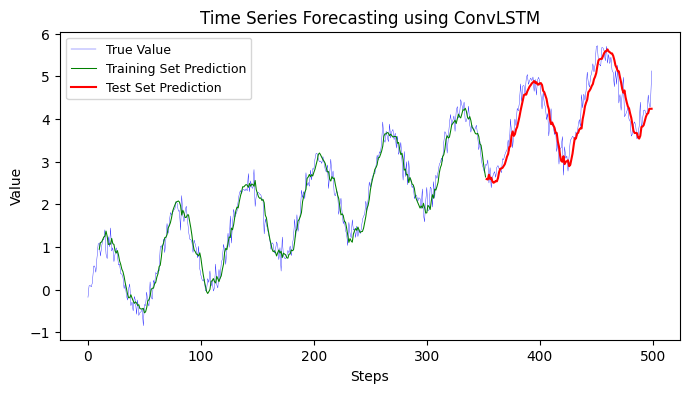

In [4]:
# Metric measurements
train_mse = mean_squared_error(Y_train, train_predict)
test_mse = mean_squared_error(Y_test, test_predict)
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")

train_mae = mean_absolute_error(Y_train, train_predict)
test_mae = mean_absolute_error(Y_test, test_predict)
print(f"Training MAE: {train_mae:.4f}")
print(f"Testing MAE: {test_mae:.4f}")

# Visualization
plt.figure(figsize=(8, 4))
plt.plot(y, label="True Value", color='blue', linewidth=0.25)
plt.plot(np.arange(SEQ_LEN, SEQ_LEN+len(train_predict)), train_predict, label="Training Set Prediction", color='green',linewidth=0.75)
plt.plot(np.arange(SEQ_LEN+len(train_predict), SEQ_LEN+len(train_predict)+len(test_predict)), test_predict, label="Test Set Prediction", color='red')
plt.xlabel("Steps")
plt.ylabel("Value")
plt.title("Time Series Forecasting using ConvLSTM")
plt.legend(loc="upper left", fontsize=9)
plt.show()
exit()

###  12.2.5 Hybrid CNN models
A hybrid CNN model combines Convolutional Neural Networks (CNNs) and Recurrent Neural Networks (RNNs) to leverage the strengths of both architectures for time series analysis and forecasting.

In a traditional time series analysis using RNNs, such as LSTMs, the sequential nature of the data is captured by the recurrent connections. However, RNNs may struggle to capture long-term dependencies in the data and can be computationally expensive. On the other hand, CNNs are powerful in capturing local patterns and spatial dependencies in data. By combining CNNs and RNNs in a hybrid model, we can benefit from the ability of CNNs to extract meaningful features from the time series data and the ability of RNNs to model temporal dependencies.

Here's an overview of how to use a hybrid CNN model for time series analysis and forecasting:

1. **Data Preprocessing:** Prepare your time series data by converting it into a suitable format for the hybrid CNN model. This typically involves transforming the time series into input-output pairs, where the input consists of a window of past observations and the output is the target value to predict.

2. **Model Architecture:** Design a hybrid CNN model that combines CNN layers with LSTM or GRU layers. The CNN layers can extract local patterns and features from the input time series, while the LSTM/GRU layers capture the temporal dependencies in the data. You can experiment with different configurations, such as the number of CNN and LSTM/GRU layers, the size of filters in CNN layers, and the number of units in LSTM/GRU layers, to find the best architecture for your specific problem.

3. **Training:** Train the hybrid CNN model on your training data. During training, the model learns to extract relevant features from the time series data and capture the underlying patterns. You can use various loss functions, optimization algorithms (e.g., Adam, RMSprop), and learning schedules to train the model.

4. **Evaluation:** Evaluate the performance of your model using appropriate evaluation metrics for time series forecasting, such as mean absolute error (MAE), root mean squared error (RMSE), or mean absolute percentage error (MAPE). Assess how well your model generalizes to unseen data by testing it on a separate validation set.

5. **Forecasting:** Once you have a trained hybrid CNN model, you can use it to make predictions on new, unseen time series data. Provide the model with a window of past observations as input and obtain the predicted value as output. You can iterate this process to generate forecasts for multiple future time steps.

6. **Model Tuning:** Fine-tune your model by experimenting with different hyperparameters, such as learning rate, batch size, and regularization techniques (e.g., dropout, L2 regularization). You can also explore other architectural variations, such as adding additional dense layers, using different activation functions, or incorporating attention mechanisms.

Remember to preprocess your data appropriately, handle missing values, consider scaling or normalizing the data, and split it into training, validation, and testing sets to avoid overfitting and obtain reliable performance estimates.

By leveraging the capabilities of CNNs and RNNs, hybrid CNN models can effectively capture both local and global patterns in time series data, leading to improved forecasting accuracy. However, it's important to note that the choice of model architecture and hyperparameters may vary depending on the specific characteristics of your time series dataset and the forecasting task at hand.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Synthetic Time Series Creation
x = np.linspace(0, 50, 500)
y = np.sin(x)
noise = 0.1 * x + np.random.normal(0, 0.2, y.shape)
y = y + noise

# Data Preparation
SEQ_LEN = 10
X, Y = [], []

for i in range(len(y) - SEQ_LEN):
    X.append(y[i:i+SEQ_LEN])
    Y.append(y[i+SEQ_LEN])

X, Y = np.array(X), np.array(Y)
train_size = int(0.7 * len(X))
X_train, Y_train = X[:train_size], Y[:train_size]
X_test, Y_test = X[train_size:], Y[train_size:]

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Hybrid CNN-LSTM Model Creation
model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(SEQ_LEN, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Training
model.fit(X_train, Y_train, epochs=50, batch_size=16, verbose=0)

# Forecasting
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)




Training MSE: 0.0658
Testing MSE: 0.2110
Training MAE: 0.2033
Testing MAE: 0.3880


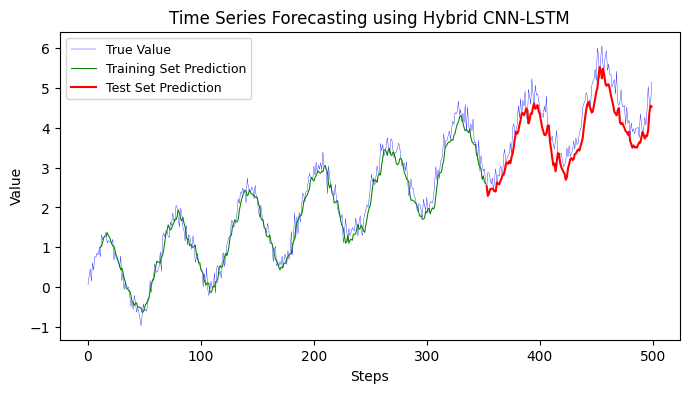

In [4]:
# Metric measurements
train_mse = mean_squared_error(Y_train, train_predict)
test_mse = mean_squared_error(Y_test, test_predict)
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")

train_mae = mean_absolute_error(Y_train, train_predict)
test_mae = mean_absolute_error(Y_test, test_predict)
print(f"Training MAE: {train_mae:.4f}")
print(f"Testing MAE: {test_mae:.4f}")

# Visualization
plt.figure(figsize=(8, 4))
plt.plot(y, label="True Value", color='blue', linewidth=0.25)
plt.plot(np.arange(SEQ_LEN, SEQ_LEN+len(train_predict)), train_predict, label="Training Set Prediction", color='green', linewidth=0.75)
plt.plot(np.arange(SEQ_LEN+len(train_predict), SEQ_LEN+len(train_predict)+len(test_predict)), test_predict, label="Test Set Prediction", color='red')
plt.xlabel("Steps")
plt.ylabel("Value")
plt.title("Time Series Forecasting using Hybrid CNN-LSTM")
plt.legend(loc="upper left", fontsize=9)
plt.show()
exit()

The main difference between ConvLSTM and a hybrid LSTM lies in their architectural design and the way they process sequential data.

1. ConvLSTM:
ConvLSTM is a type of recurrent neural network (RNN) architecture that combines convolutional layers and LSTM layers. It extends the LSTM model by incorporating convolutional operations within the LSTM cells. The ConvLSTM model is designed to capture both spatial and temporal dependencies in the input data simultaneously. It operates on 3D input tensors, where the dimensions are (batch_size, time_steps, rows, columns, channels).

2. Hybrid LSTM:
A hybrid LSTM refers to a combination of different neural network layers, where an LSTM layer is used in conjunction with other layers such as convolutional layers, fully connected layers, or other types of recurrent layers. The specific architecture of a hybrid LSTM can vary depending on the problem domain and the specific requirements of the task.

In general, the choice between ConvLSTM and a hybrid LSTM depends on the nature of the data and the problem at hand:

- ConvLSTM is useful when dealing with spatiotemporal data, such as video data or image sequences, where both spatial and temporal information is important. ConvLSTM can effectively capture the dependencies in both spatial and temporal dimensions simultaneously.

- A hybrid LSTM, on the other hand, allows you to combine LSTM with other types of layers, enabling more flexibility and the ability to incorporate different types of information or features. This can be beneficial when working with time series data that may have additional non-sequential features or when there is a need to incorporate domain-specific knowledge into the model architecture.

Ultimately, the choice between ConvLSTM and hybrid LSTM depends on the specific characteristics of the dataset and the goals of the task. It is often recommended to experiment with different architectures and compare their performance to determine the most suitable model for a given task.

## 12.3 Transformer Models
The Transformer architecture, introduced in the paper "*Attention Is All You Need*" by *Vaswani et al. in 2017*, revolutionized the field of Natural Language Processing (NLP) by achieving state-of-the-art performance on a wide range of tasks. Since then, researchers have been actively exploring its applications in other domains, including Time Series Analysis (TSA).

### 12.3.1 Transformer for Time Series Analysis

1. **Sequence Modeling**: Like sequences of words in text, time series data can be considered as a sequence of data points. Transformers, with their self-attention mechanism, are capable of capturing dependencies regardless of their distance in the sequence, making them highly suitable for modeling time series data.

2. **Variable-Length Sequences**: Transformers can handle variable-length sequences. This is especially beneficial in time series forecasting, where one might want to predict multiple future time steps at once or handle series of varying lengths.

3. **Interpretable Results**: The self-attention mechanism produces attention weights, which can be interpreted as the importance of various time steps in predicting the next point. This can be useful in understanding influential past events or patterns in the series.

### 12.3.2 Implementation Details for TSA

1. **Embedding Layer**: In NLP tasks, the Transformer starts with an embedding layer that turns tokens into vectors. In the context of TSA, this can be a simple dense layer, scaling, or even skipped, as the input is already numeric.

2. **Positional Encoding**: One of the main features of the Transformer architecture is that it doesn't have an inherent notion of the position or order of data, which is crucial for time series. To account for this, positional encodings (usually sinusoidal) are added to the embeddings to give the model information about the position of data points in the sequence.

3. **Forecasting Horizon**: For forecasting, the model can be trained in a way similar to autoregressive models. For instance, given values up to time \( t \), predict the value at time \( t+1 \).

4. **Multivariate Time Series**: If there are multiple series (e.g., multiple features measured over time), these can be treated as channels, similar to how RGB channels are handled in image data.

### 12.3.3 Challenges and Considerations

1. **Computational Cost**: Transformers can be computationally expensive and might require specialized hardware (like GPUs) for efficient training.

2. **Data Requirements**: Transformers typically require a lot of data to train without overfitting. For many real-world time series tasks (like financial data), data can be limited.

3. **Sequence Length**: Long sequences can be challenging due to memory requirements. Techniques like windowing or down-sampling can be considered.

4. **Hybrid Models**: Often, hybrid models that combine transformers with other architectures (like CNNs or LSTMs) can be used for better results.

### 12.3.4 Recent Developments

There have been newer architectures like the Temporal Fusion Transformer (TFT) designed specifically for time series forecasting. The TFT uses the self-attention mechanism of the Transformer, combined with recurrent-style gates, to better handle the temporal dependencies of time series data.

### Conclusion

While Transformers are primarily known for their achievements in NLP, their potential for time series forecasting is significant. With the right adaptations and considerations, they can be a powerful tool for TSA tasks. However, as always, the choice of model should be based on the specific characteristics of the data and the problem at hand.





## 12.4 Autoencoders
Autoencoders have gained significant attention in Time Series Analysis (TSA) due to their ability to learn representations from time series data in an unsupervised manner. Let's dive into the details.

### 12.4.1 What is an Autoencoder?

An autoencoder is a neural network used for unsupervised learning of efficient codings. The main idea behind an autoencoder is to encode an input (in our case, a time series) into a compact, lower-dimensional representation and then decode that representation back into the original input. The network is trained to minimize the difference between the input and its reconstruction.

### 12.4.2 Autoencoders in Time Series Analysis

1. **Feature Extraction**: Time series data often contain noise and redundant information. Autoencoders can capture the most salient features of the data by reducing its dimensionality, making subsequent analysis or forecasting more efficient.

2. **Anomaly Detection**: One of the most popular applications of autoencoders in TSA is anomaly detection. After training on "normal" time series data, the autoencoder will have higher reconstruction error for anomalous data points or sequences, signaling potential outliers or events of interest.

3. **Denoising**: Denoising autoencoders are trained to reconstruct time series data from noisy versions of the data, effectively serving as a filter to smooth out noise and make patterns more discernible.

4. **Sequence-to-Sequence Forecasting**: Variants of autoencoders, like the sequence-to-sequence model with LSTM layers, can be used for multi-step ahead forecasting.

5. **Compression**: In scenarios where storage is a concern, autoencoders can be used to compress time series data efficiently.

### 12.4.3 Implementation Details for TSA

1. **Sequence Length**: The choice of sequence length (how many time steps per input sequence) can impact the performance of an autoencoder, and it's often domain-specific.

2. **Architecture Variants**: Depending on the task and data, different architectures can be employed:
   - **Vanilla Autoencoders**: Simple feed-forward networks.
   - **Convolutional Autoencoders (CAE)**: Effective for time series with local patterns or when using sliding windows.
   - **Recurrent Autoencoders**: Use RNNs, typically LSTMs or GRUs, to handle sequences and are suited for longer dependencies.
   - **Variational Autoencoders (VAE)**: Adds a probabilistic twist, enabling the generation of new, similar sequences.

3. **Loss Functions**: Mean Squared Error (MSE) is commonly used for continuous time series data. For binary or categorical series, a cross-entropy loss might be more appropriate.

### 12.4.4 Challenges and Considerations

1. **Interpretability**: The representations learned by autoencoders are not always directly interpretable.

2. **Training Complexity**: Training deep autoencoders can be computationally intensive and may require a lot of data.

3. **Choosing Architecture**: The type and depth of the autoencoder should match the complexity and characteristics of the time series data.

### 12.4.5 Conclusion

Autoencoders offer a flexible, unsupervised approach to TSA, capable of feature extraction, anomaly detection, denoising, and more. Their ability to capture latent structures in data makes them a valuable tool, especially when labeled data is scarce or when trying to uncover hidden patterns in the series. However, like all models, their efficacy depends on the specific problem, data characteristics, and proper tuning.

## 12.5 Generative Adversarial Networks (GANs)

Generative Adversarial Networks (GANs) have emerged as a powerful tool for generative tasks across various domains. They have been adapted and employed for Time Series Analysis (TSA) as well. Here's an overview:

### 12.5.1 Basics of GAN

A GAN consists of two primary components:
1. **Generator (G)**: This network tries to generate data. Given some random noise as input, it produces an output that ideally is indistinguishable from real data.
2. **Discriminator (D)**: This network tries to distinguish between real data and fake data produced by the generator.

The training process is a game where the generator tries to produce fake samples that the discriminator can't distinguish from real samples, while the discriminator tries to get better at distinguishing real samples from fake. Over time, the generator gets better at generating realistic samples.

### 12.5.2 GANs in Time Series Analysis

1. **Data Augmentation**: One of the primary uses of GANs in TSA is to augment existing data. If you have limited time series data, a GAN can generate additional data that resembles your real data.

2. **Anomaly Detection**: After a GAN is trained on "normal" time series data, you can use it to identify anomalies. The idea is that the generator will not be good at generating anomalies (because it hasn't seen them), so anomalies will have different characteristics when processed by the discriminator or will lead to higher reconstruction errors.

3. **Forecasting**: GANs can be combined with other architectures (like LSTMs or CNNs) to predict future values in a time series. The GAN ensures that the generated sequences are realistic, providing an additional layer of regularization.

4. **Feature Extraction**: The generator in a GAN can be used as a feature extractor. The layers of the generator can transform a time series into a compact representation, which can then be used for tasks like clustering or classification.

5. **Simulation**: For domains like finance, GANs can simulate different economic scenarios or stock price movements, helping in risk assessment and strategy testing.

### 12.5.3 Implementation Details for TSA

1. **Sequence Length**: Similar to other neural architectures for TSA, the length of the input sequence can impact the performance of a GAN. This decision often depends on the domain and specific problem.

2. **Architecture Variants**: There are many GAN variants that can be applied to TSA:
   - **Conditional GANs (cGANs)**: Generate time series data based on certain conditions or labels.
   - **Recurrent GANs (R-GANs)**: Incorporate RNNs to handle sequence data better.
   - **Wasserstein GANs (W-GANs)**: Use a different loss function to provide more stability during training.

3. **Stability**: GANs are notoriously difficult to train due to issues like mode collapse, vanishing gradients, and oscillatory behavior. Techniques like gradient clipping, using different architectures, or employing the Wasserstein loss can help mitigate these challenges.

### 12.5.4 Challenges and Considerations

1. **Evaluation**: Evaluating the performance of GANs, especially in generative tasks, can be tricky. Traditional accuracy metrics might not be appropriate, and qualitative assessments (like visual inspection) often become necessary.

2. **Mode Collapse**: This occurs when the generator produces limited varieties of samples, or the same sample, regardless of the input noise.

3. **Training Time**: GANs can be computationally expensive and time-consuming to train, especially for long time series data.

### 12.5.5 Conclusion

GANs present a novel approach to TSA, providing capabilities beyond traditional methods. While they offer a powerful mechanism for generative tasks, anomaly detection, and even forecasting, their complex training dynamics necessitate careful tuning and understanding. As research progresses, we'll likely see even more robust and specialized GAN architectures for time series data.